# Email classifiction using Machine Learning

# Introduction:

Email classification using machine learning is a powerful technique for automating the sorting of emails into predefined categories such as spam and legitimate (ham) emails. By imposing algorithms like Random Forests, this process can efficiently analyze email content. Machine learning-based email classification enhances productivity by prioritizing important emails and reducing the burden of sorting through irrelevant or potentially harmful messages.

# Tools and Libraries:

- Python
- Jupyter Notebook
- Scikit-learn
- Pandas
- NumPy
- Matplotlib

In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import OrdinalEncoder

# Data understanding

In [90]:
raw_df=pd.read_csv('spam.csv')
display(raw_df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [91]:
print('The missing values in the given columns are as follows ',raw_df.isnull().sum())

The missing values in the given columns are as follows  v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [92]:
#droping columns with null values, and consider only v1 and v2

df=raw_df[['v1','v2']]
display(df)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis (EDA)

Index(['ham', 'spam'], dtype='object') [4825  747]


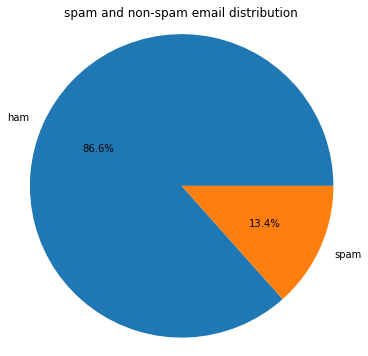

In [93]:
v1_counts=df['v1'].value_counts()
labels=v1_counts.index
size=v1_counts.values

print(labels,size)

plt.figure(figsize=(6,6))
plt.pie(size,labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('spam and non-spam email distribution')
plt.show()



# Model training, selection and evaluation:

In [94]:
#define features and target variables as X and y respectively
X=list(df['v2'])
y = list(df['v1'])

#train, test and split data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


#vectorise training and test set as feature vector
vectorizer = CountVectorizer()
X_train_vec= vectorizer.fit_transform(X_train)
X_test_vect= vectorizer.transform(X_test)

#fit the training set into a Random Forest model
rf_model= RandomForestClassifier()
rf_model.fit(X_train_vec,y_train)


RandomForestClassifier()

In [95]:
#evaluating the perfomance of the model
y_pred= rf_model.predict(X_test_vect)

#use accuracy score as our metric
accuracy = accuracy_score(y_test,y_pred)

print('The accuracy score is: ',accuracy)



The accuracy score is:  0.9748878923766816


In [96]:
for email, prediction in zip(X_test,y_pred):
    print('_____________________________________________________________________________________________')
    print(f'Email Text: {email} \n ')
    if prediction=='ham':
        print('**This is a NON-SPAM email**')
    else:
        print('**This is a SPAM email**')
    print('_____________________________________________________________________________________________')
    print()

_____________________________________________________________________________________________
Email Text: Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: We know someone who you know that fancies you. Call 09

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Fun fact: although you would think armand would eventually build up a tolerance or some shit considering how much he smokes, he gets fucked up in like 2 hits 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: But i dint slept in afternoon. 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: I think if he rule tamilnadu..then its very tough for our people. 
 
**This is a NON-SPAM email**
_________________

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Helloooo... Wake up..! \Sweet\" \"morning\" \"welcomes\" \"You\" \"Enjoy\" \"This Day\" \"with full of joy\".. \"GUD MRNG\"." 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Cuz ibored. And don wanna study 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Hey! There's veggie pizza... :/ 
 
**This is a NON-SPAM email**
__________________________________________________________________________________

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Ya but it cant display internal subs so i gotta extract them 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: WINNER! As a valued network customer you hvae been selected to receive a �900 reward! To collect call 09061701444. Valid 24 hours only. ACL03530150PM 
 
**This is a SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Auction round 4. The highest bid is now �54. Next maximum bid is �71. To bid, send BIDS e. g. 10 

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Do you want a New Nokia 3510i Colour Phone Delivered Tomorrow? With 200 FREE minutes to any mobile + 100 FREE text + FREE camcorder Reply or Call 08000930705 
 
**This is a SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Ok. She'll be ok. I guess 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Will do. Have a good day 
 
**This is a NON-SPAM email**
___________________________________________________________________

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Hi. Hope ur day * good! Back from walk, table booked for half eight. Let me know when ur coming over. 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com 
 
**This is a SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Yes. They replied my mail. I'm going to the management offi

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: He is impossible to argue with and he always treats me like his sub, like he never released me ... Which he did and I will remind him of that if necessary 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Why are u up so early? 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: WOW! The Boys R Back. TAKE THAT 2007 UK Tour. Win VIP Tickets & pre-book with VIP Club. Txt CLUB to 81303. Trackmarque Ltd inf

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: 4 tacos + 1 rajas burrito, right? 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: \alright babe 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Dear umma she called me now :-) 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Ema

**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Haha better late than ever, any way I could swing by? 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Santa calling! Would your little ones like a call from Santa Xmas Eve? Call 09077818151 to book you time. Calls1.50ppm last 3mins 30s T&C www.santacalling.com 
 
**This is a SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: We walked from my moms. Right on stagwood pass right on winterstone left on victors hill. Addre

**This is a SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Dont show yourself. How far. Put new pictures up on facebook. 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: Our Prashanthettan's mother passed away last night. pray for her and family. 
 
**This is a NON-SPAM email**
_____________________________________________________________________________________________

_____________________________________________________________________________________________
Email Text: I wake up long ago already... Dunno, what other thing? 
 
**This is a NON-SPAM email**
__________________________________________________________________________________